 El desafío consta de 3 ejercicios independientes que van desde análisis exploratorio, machine learning o el diseño de una solución de data science.

 ¿Qué evaluamos?

 El desafío busca evaluar distintos aspectos como:

- Capacidad analitica y exploración de datos
- Visualización de resultados
- Conocimientos de técnicas de generación de features y modelado
- Análisis de performance
- Buenas prácticas de desarrollo
- Diseño e implementación de Machine learning en producción

 Algunas reglas y recomendaciones:
 1. La mayoría de los ejercicios se piden resolver en Jupyter notebooks y te recomendamos subirlas a un repositorio de GitHub público para compartir los resultados.
 2. No dejes de hacernos preguntas sobre cualquier duda con los enunciados. El desafío se analiza de acuerdo al seniority del postulante y teniendo en cuenta también las necesidades particulares de la posición.

1. Explorar las ofertas relámpago, ¿qué insights puedes generar?

- __Descripción__

 En conjunto con el desafío te compartimos un archivo llamado "ofertas_relampago.csv" el cual posee información de los resultados de ofertas del tipo relampago para un periodo de tiempo y un país determinado.

 Estas ofertas en mercadolibre se pueden ver de la siguiente manera:

 Es decir, son ofertas que tienen una duración definida de algunas horas y un porcentaje de unidades (stock) comprometidas.

 El objetivo de este desafío es hacer un EDA sobre estos datos buscando insights sobre este tipo de ofertas.

 Las columnas del dataset son autoexplicativas pero puedes preguntarnos cualquier duda.

- __Entregable__

 El entregable de este desafío es una Jupyter notebook con el EDA.

2. Similitud entre productos:

- __Descripción__

 Un desafío constante en MELI es el de poder agrupar productos similares utilizando algunos atributos de estos como pueden ser el título, la descripción o su imagen.

 Para este desafío tenemos un dataset "items_titles.csv" que tiene títulos de 30 mil productos de 3 categorías diferentes de Mercado Libre Brasil

- __Entregable__

 El objetivo del desafío es poder generar una Jupyter notebook que determine cuán similares son dos títulos del dataset "item_titles_test.csv" generando como output un listado de la forma donde ordenando por score de similitud podamos encontrar los pares de productos más
 similares en nuestro dataset de test.

3. Previsión de falla

- __Descripción__

 Los galpones de Full de mercado libre cuentan con una flota de dispositivos que transmiten diariamente telemetría agregada en varios atributos.

 Las técnicas de mantenimiento predictivo están diseñadas para ayudar a determinar la condición del equipo de mantenimiento en servicio para predecir cuándo se debe realizar el mantenimiento. Este enfoque promete ahorros de costos sobre el mantenimiento preventivo
 de rutina o basado en el tiempo porque las tareas se realizan solo cuando están justificadas.

- __Entregable__

 Tiene la tarea de generar una Jupyter notebook con un modelo predictivo para predecir la probabilidad de falla del dispositivo con el objetivo de bajar los costos del proceso. Como una referencia, una falla de un dispositivo tiene un costo de 1 mientras el costo de un mantenimiento es 0,5. El archivo "full_devices.csv" tiene los valores diários para los 9 atributos de los dispositivos y la columna que está tratando de predecir se llama 'failure' con el valor binario 0 para no fallar y 1 para fallar

In [1]:
import pandas as pd
import numpy as np
import os

import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import tree

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN

from tqdm.notebook import tqdm

from google.colab import drive
drive.mount('/content/drive')

pd.set_option('display.max_colwidth', None)

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
print(os.getcwd())

/content


In [3]:
directory_path = '/content/drive/My Drive/mercado_livre'
os.chdir(directory_path)

In [4]:
os.listdir(directory_path)

['ofertas_relampago.csv',
 'full_devices.csv',
 'items_titles_test.csv',
 'items_titles.csv',
 'Technical Challenge v2.pdf',
 'similar_products_test.csv',
 'Desafio_2.ipynb',
 'Desafio_1.ipynb',
 'Desafio_3.ipynb']

In [5]:
path_full_devices = f'{directory_path}/full_devices.csv'

In [6]:
df_full_devices_orig = pd.read_csv(path_full_devices, encoding='latin-1')

In [7]:
df_full_devices_orig.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


Verficação de inconsistência na base (nulos)

In [8]:
print('full_devices_df', df_full_devices_orig.isnull().sum().sum())

full_devices_df 0


In [9]:
print(df_full_devices_orig['failure'].value_counts())

failure
0    124388
1       106
Name: count, dtype: int64


In [10]:
df_full_devices_orig.columns

Index(['date', 'device', 'failure', 'attribute1', 'attribute2', 'attribute3',
       'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute8',
       'attribute9'],
      dtype='object')

In [11]:
df_full_devices_orig.shape

(124494, 12)

In [12]:
df_full_devices = df_full_devices_orig[['failure', 'attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute8', 'attribute9']]
df_full_devices.head()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,0,215630672,56,0,52,6,407438,0,0,7
1,0,61370680,0,3,0,6,403174,0,0,0
2,0,173295968,0,0,0,12,237394,0,0,0
3,0,79694024,0,0,0,6,410186,0,0,0
4,0,135970480,0,0,0,15,313173,0,0,3


In [13]:
pd.DataFrame(df_full_devices.corr()['failure']).sort_values(by='failure', ascending = False).style.background_gradient(cmap='Blues')

,failure
failure,1.000000
attribute7,0.119055
attribute8,0.119055
attribute4,0.067398
attribute2,0.052902
attribute5,0.002270
attribute1,0.001983
attribute9,0.001622
attribute6,-0.000550
attribute3,-0.000948


In [14]:
# Antes de levar as features para o modelo é importante seleciona-las.
# Se elas possuem uma alta correlação podem afetar negativamente a performance do modelo devido a multicolinearidade, podendo causar overfitting e instabilidade nos coef.

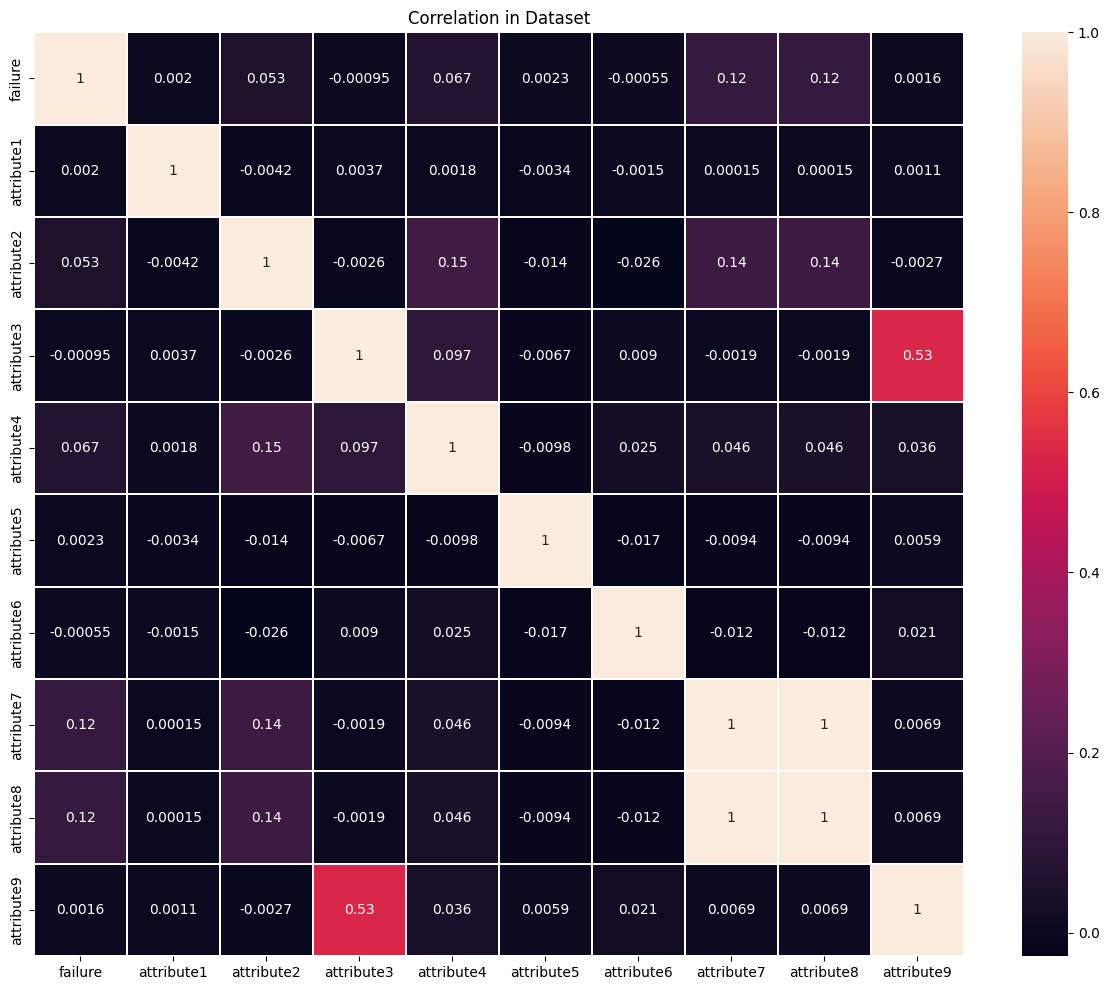

In [15]:
corr = df_full_devices.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True, linewidth = 0.2)
plt.title('Correlation in Dataset');

In [16]:
# o atributo 7 e 8 são idênticos ao longo de toda base, dessa forma posso remover um deles sem ter perda de informação
df_full_devices[df_full_devices['attribute7'] != df_full_devices['attribute8']].shape

(0, 10)

In [17]:
df_full_devices.drop('attribute8', axis=1, inplace=True)

<ipython-input-17-a20b9ac1126a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full_devices.drop('attribute8', axis=1, inplace=True)


In [18]:
df_full_devices.shape

(124494, 9)

In [19]:
# Prepare the data
X = df_full_devices.drop('failure', axis=1)
y = df_full_devices['failure']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

results = {}

X_train (87145, 8)
X_test (37349, 8)
y_train (87145,)
y_test (37349,)


In [20]:
y_train.value_counts()

,count
failure,
0,87069
1,76


In [21]:
y_test.value_counts()

,count
failure,
0,37319
1,30


In [22]:
# Aqui estamos enfrentando um problema de desbalanceamento de classes, ou seja, a quantidade de uma das classes é discrepantemente maior que a do outra.
# Para podermos trabalhar com esse tipo de problema devemos tentar equilibrar a quantidade de cada classe. Algumas opções são RandomOverSampler, RandomUnderSampler, SMOTE e ADASYN.

In [23]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    return accuracy, precision, recall, f1, tn, fp, fn, tp

# Define the models to evaluate
models = {
    'Logistic Regression (l1)': LogisticRegression(penalty='l1', solver='liblinear', random_state=42),
    'Logistic Regression (l2)': LogisticRegression(penalty='l2', solver='liblinear', random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=7),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=42)
}

# Define the resampling techniques
resampling_techniques = {
    'No Resampling': None,
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'RandomUnderSampler': RandomUnderSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42)
}

df_results = pd.DataFrame(columns=['Model', 'Resampling', 'Accuracy', 'Precision', 'Recall', 'F1', 'TN', 'FP', 'FN', 'TP'])

for model_name, model in tqdm(models.items(), desc="Models"):
    for resample_name, resampler in tqdm(resampling_techniques.items(), desc="Resampling Techniques", leave=False):
        # Resample the training data
        if resample_name == 'No Resampling':
            model.fit(X_train, y_train)
        else:
            X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)
            model.fit(X_train_resampled, y_train_resampled)

        # Evaluate the model
        accuracy, precision, recall, f1, tn, fp, fn, tp = evaluate_model(model, X_test, y_test)

        # Append the result to the results DataFrame
        df_results = pd.concat([df_results, pd.DataFrame({
            'Model': [model_name],
            'Resampling': [resample_name],
            'Accuracy': [accuracy],
            'Precision': [precision],
            'Recall': [recall],
            'F1': [f1],
            'TN': [tn],
            'FP': [fp],
            'FN': [fn],
            'TP': [tp]
        })], ignore_index=True)

Models:   0%|          | 0/6 [00:00<?, ?it/s]

Resampling Techniques:   0%|          | 0/5 [00:00<?, ?it/s]

<ipython-input-23-506ec567649c>:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, pd.DataFrame({
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Resampling Techniques:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Resampling Techniques:   0%|          | 0/5 [00:00<?, ?it/s]

Resampling Techniques:   0%|          | 0/5 [00:00<?, ?it/s]

Resampling Techniques:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:30:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:30:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:30:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:30:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:30:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Resampling Techniques:   0%|          | 0/5 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 76, number of negative: 87069
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 999
[LightGBM] [Info] Number of data points in the train set: 87145, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000872 -> initscore=-7.043723
[LightGBM] [Info] Start training from score -7.043723
[LightGBM] [Info] Number of positive: 87069, number of negative: 87069
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 999
[LightGBM] [Info] Number of data points in the train set: 174138, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 76, number of negative: 76
[LightGB

In [24]:
df_results.sort_values('Recall', ascending=False)

,Model,Resampling,Accuracy,Precision,Recall,F1,TN,FP,FN,TP
22,XGBoost,RandomUnderSampler,0.808134,0.003064,0.733333,0.006103,30161,7158,8,22
17,Random Forest,RandomUnderSampler,0.827385,0.003251,0.700000,0.006472,30881,6438,9,21
27,LightGBM,RandomUnderSampler,0.831160,0.003324,0.700000,0.006616,31022,6297,9,21
12,Decision Tree,RandomUnderSampler,0.880024,0.004012,0.600000,0.007970,32850,4469,12,18
2,Logistic Regression (l1),RandomUnderSampler,0.920560,0.005722,0.566667,0.011330,34365,2954,13,17
11,Decision Tree,RandomOverSampler,0.926129,0.006153,0.566667,0.012173,34573,2746,13,17
7,Logistic Regression (l2),RandomUnderSampler,0.834320,0.002424,0.500000,0.004825,31146,6173,15,15
1,Logistic Regression (l1),RandomOverSampler,0.960695,0.010218,0.500000,0.020027,35866,1453,15,15
3,Logistic Regression (l1),SMOTE,0.971405,0.013133,0.466667,0.025547,36267,1052,16,14
4,Logistic Regression (l1),ADASYN,0.971753,0.013295,0.466667,0.025854,36280,1039,16,14


In [25]:
# Estabelecendo que a métrica que eu quero maximizar é o recall, por se tratar de uam base desbalanceada, eu quero aumentar a minha detecção de casos positivos.
# Os modelos que tiveram as melhores perfomances foram o XGBoost, o LightGBM e o Random Forest (dentro dos modelos testados) utilizando o resampling de RandomUnderSampler.
# Dessa vez, sera feito um grid search, alterando os hiperparametros desses algoritmos para encontrar o ajuste ótimo.
# Nesse caso, a métrica que será otimizada sera o f1 porque quero reduzir a quantidade de falsos positivos, pensando que o alerta gera custo.

In [26]:
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

lgbm_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 50, 100]
}

lgbm_model = LGBMClassifier(random_state=42)
lgbm_grid_search = GridSearchCV(estimator=lgbm_model, param_grid=lgbm_param_grid, cv=5, scoring='f1')
lgbm_grid_search.fit(X_train_resampled, y_train_resampled)

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='f1')
rf_grid_search.fit(X_train_resampled, y_train_resampled)

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, scoring='f1')
xgb_grid_search.fit(X_train_resampled, y_train_resampled)

A saída de streaming foi truncada nas últimas 5000 linhas.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:32:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:32:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:32:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:32:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:32:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='f1')

In [27]:
best_lgbm_model = lgbm_grid_search.best_estimator_
best_rf_model = rf_grid_search.best_estimator_
best_xgb_model = xgb_grid_search.best_estimator_

dict_best = {}
dict_best['lgbm'] = evaluate_model(best_lgbm_model, X_test, y_test)
dict_best['rf'] = evaluate_model(best_rf_model, X_test, y_test)
dict_best['xgb'] = evaluate_model(best_xgb_model, X_test, y_test)

In [28]:
df_best = pd.DataFrame(dict_best).transpose()
df_best.columns = ['Accuracy', 'Precision', 'Recall', 'F1', 'TN', 'FP', 'FN', 'TP']
df_best

,Accuracy,Precision,Recall,F1,TN,FP,FN,TP
lgbm,0.881844,0.004970,0.733333,0.009872,32914.0,4405.0,8.0,22.0
rf,0.897695,0.005479,0.700000,0.010872,33507.0,3812.0,9.0,21.0
xgb,0.851643,0.004139,0.766667,0.008233,31785.0,5534.0,7.0,23.0


In [29]:
# O melhor modelo então ficou com o Random Forest acertando 21 dos 30 (TP) eventos positivos do teste e além disso que a menor taxa de FP.

In [30]:
df_hiperparameters = pd.DataFrame(rf_grid_search.cv_results_)
df_hiperparameters.sort_values('rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
23,0.276039,0.005243,0.018076,0.002571,3,4,5,200,"{'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}",0.812500,0.740741,0.965517,0.857143,0.827586,0.840697,0.073224,1
20,0.271547,0.005388,0.020344,0.003293,3,4,2,200,"{'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}",0.812500,0.740741,0.965517,0.857143,0.827586,0.840697,0.073224,1
43,0.235135,0.009615,0.017227,0.002047,5,2,10,100,"{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}",0.812500,0.740741,0.933333,0.857143,0.827586,0.834261,0.062615,3
2,0.460981,0.006280,0.026860,0.001781,3,1,2,200,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}",0.774194,0.740741,0.965517,0.857143,0.827586,0.833036,0.077644,4
14,0.360941,0.079266,0.023730,0.004261,3,2,5,200,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}",0.774194,0.740741,0.965517,0.857143,0.827586,0.833036,0.077644,4


In [31]:
print("Best hyperparameters:", rf_grid_search.best_params_)

Best hyperparameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [32]:
best_model = rf_grid_search.best_estimator_
importances = best_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=feature_importance_df['Feature'],
    y=feature_importance_df['Importance']))

fig.show()

In [33]:
prob_evento_train = best_model.predict_proba(X_train)[:, 1]
prob_evento_test = best_model.predict_proba(X_test)[:, 1]

X_train['probabilidade_failure'] = prob_evento_train
X_test['probabilidade_failure'] = prob_evento_test

In [34]:
train_reconstituido = pd.concat([X_train, y_train], axis=1)
test_reconstituido = pd.concat([X_test, y_test], axis=1)
df_full_devices_reconstituido = pd.concat([train_reconstituido, test_reconstituido], axis=0)
df_full_devices_reconstituido.sort_index(inplace=True)

In [35]:
df_full_devices_reconstituido.head()

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,probabilidade_failure,failure
0,215630672,56,0,52,6,407438,0,7,0.767053,0
1,61370680,0,3,0,6,403174,0,0,0.260262,0
2,173295968,0,0,0,12,237394,0,0,0.314784,0
3,79694024,0,0,0,6,410186,0,0,0.214473,0
4,135970480,0,0,0,15,313173,0,3,0.329273,0


In [36]:
df_full_devices_reconstituido_failure = df_full_devices_reconstituido[df_full_devices_reconstituido['failure'] == 1]

print(df_full_devices_reconstituido_failure.shape)
print(df_full_devices_reconstituido_failure[df_full_devices_reconstituido_failure['probabilidade_failure'] >= 0.5].shape)
print(df_full_devices_reconstituido_failure[df_full_devices_reconstituido_failure['probabilidade_failure'] <  0.5].shape)

(106, 10)
(83, 10)
(23, 10)


In [37]:
# De todos os 106 eventos onde houveram falha o modelo final conseguiu detectar 83 dos casos, ou seja, 78.3% dos casos.
# A mediana de probabilidade é de 0.70 entre os eventos de falha.

In [38]:
df_full_devices_reconstituido_failure = df_full_devices_reconstituido[df_full_devices_reconstituido['failure'] == 1]['probabilidade_failure']

fig = go.Figure()

fig.add_trace(go.Box(
    y=df_full_devices_reconstituido_failure,
    name='Failure',
    marker_color='red'
))

fig.update_layout(
    title='Boxplot da Distribuição da Probabilidade de Falha por Classe',
    xaxis_title='Falha',
    yaxis_title='Probabilidade de Falha'
)

fig.show()